# CIS9650 Group Project 
Hojin Lee

**Dataset we chose for the project**
- https://www.kaggle.com/airbnb/seattle?select=reviews.csv
- Using only listings.csv, including full descriptions and average review score


**Data analysis plan**
- Importing the Airbnb data to clean
- Dropping insiginificant columns
- Dealing with missing values and outliers on numerical and categorical variables
- Performing statistical analysis including mean, max, min, correlation, and more
- Data visualization using both categorical and numerical variables
- Exporting the clean data to a database using Sqlite3

**Goal**
- Comparison between price and reviews
- Comparison between price and bed type
- Comparison between number of listings and neighborhood 

## Step1) Importing the data to clean

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline 

In [2]:
df = pd.read_csv("listings.csv")

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
df.shape

(3818, 92)

# Step2) Cleaning the data

### **Dropping insignificant columns**

In [6]:
# Checking columns with 1 unique values
for col in df.columns:
    if df[col].nunique() == 1:
        print(col)

scrape_id
last_scraped
experiences_offered
market
country_code
country
has_availability
calendar_last_scraped
requires_license
jurisdiction_names


In [7]:
# columns with 1 unique values are not unique through all rows- 
# doesn't contribute into our analysis - so we drop these columns first
df.drop(columns=["scrape_id","last_scraped","experiences_offered","market","country_code",
              "country","has_availability","calendar_last_scraped","requires_license",
              "jurisdiction_names"], inplace=True)

In [8]:
# Multiple id, url, summary, description, and street don't contribute into our analysis.
# so we are going to drop them as well.
columns_to_drop = ["id","listing_url","summary","space","neighborhood_overview","description",
                   "notes", "transit","thumbnail_url", "medium_url", "picture_url", 
                   "xl_picture_url", "name","host_id","host_url","host_name", "host_about",
                   "host_thumbnail_url","host_picture_url","host_listings_count",
                   "host_verifications","street","neighbourhood_cleansed",
                   "neighbourhood_group_cleansed","state","smart_location",
                   "latitude","longitude","amenities","calendar_updated","availability_90",
                   "availability_365","first_review","last_review","license"]

df.drop(columns=columns_to_drop, inplace=True)

In [9]:
# Before dropping insignificant columns: instances 3818 & attributes/features 92  
df.shape

(3818, 47)

### Dealing with numerical variables
### - Replacing missing values with median
- First of all, we are going to deal with numerical variables first, and then categorical variables

In [10]:
# total missing values
df.isnull().sum().sum()

18602

In [11]:
# all columns to replace all the missing values(NaN) with median
all_columns_to_replace = ['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 
       'beds', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 
       'calculated_host_listings_count','reviews_per_month']

In [12]:
# While replacing with median, some variables have the mark such as "$" and "%" so we can't replace them
# so we are going to change those variables into numerical dtype first.
columns_to_change_dtypes = ['host_response_rate', 'host_acceptance_rate',
    'price','weekly_price', 'monthly_price','security_deposit', 
    'cleaning_fee', 'extra_people']

In [13]:
# First, we are going to deal with "object" variables
df[columns_to_change_dtypes].head()

,host_response_rate,host_acceptance_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,96%,100%,$85.00,NaN,NaN,NaN,NaN,$5.00
1,98%,100%,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00
2,67%,100%,$975.00,NaN,NaN,"$1,000.00",$300.00,$25.00
3,NaN,NaN,$100.00,$650.00,"$2,300.00",NaN,NaN,$0.00
4,100%,NaN,$450.00,NaN,NaN,$700.00,$125.00,$15.00


In [14]:
df[columns_to_change_dtypes].dtypes

host_response_rate      object
host_acceptance_rate    object
price                   object
weekly_price            object
monthly_price           object
security_deposit        object
cleaning_fee            object
extra_people            object
dtype: object

In [15]:
# 'host_response_rate': endswith %
# 'host_acceptance_rate': endswith %
# 'price','weekly_price': startswith $
# 'monthly_price': startswith $
# 'security_deposit': startswith $
# 'cleaning_fee': startswith $
# 'extra_people': startswith $

# for varialbes with %
def trim_col(col):
    df[col] = df[col].replace("%", "", regex=True).astype(np.float64)
    
trim_col('host_response_rate')
trim_col('host_acceptance_rate')

# for variables with $
def trim_col2(col2):
    df[col2] = df[col2].str.replace('$', '', regex=True)
    df[col2] = df[col2].str.replace(',', '')
    df[col2] = df[col2].astype('float')
    
trim_col2('price')
trim_col2('weekly_price')
trim_col2('monthly_price')
trim_col2('security_deposit')
trim_col2('cleaning_fee')
trim_col2('extra_people')

In [16]:
# Now, we can see them without the mark
df[columns_to_change_dtypes].head()

,host_response_rate,host_acceptance_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,96.0,100.0,85.0,NaN,NaN,NaN,NaN,5.0
1,98.0,100.0,150.0,1000.0,3000.0,100.0,40.0,0.0
2,67.0,100.0,975.0,NaN,NaN,1000.0,300.0,25.0
3,NaN,NaN,100.0,650.0,2300.0,NaN,NaN,0.0
4,100.0,NaN,450.0,NaN,NaN,700.0,125.0,15.0


In [17]:
df[columns_to_change_dtypes].dtypes

host_response_rate      float64
host_acceptance_rate    float64
price                   float64
weekly_price            float64
monthly_price           float64
security_deposit        float64
cleaning_fee            float64
extra_people            float64
dtype: object

In [18]:
# We are ready to replace all the numerical variables with median
for i in df.columns:
    if i in all_columns_to_replace:
        df[i].fillna(df[i].median(), inplace=True)
    
# No more numerical missing variables
df[all_columns_to_replace].isnull().sum().sum()

0

### **Removing outliers of numerical variables**

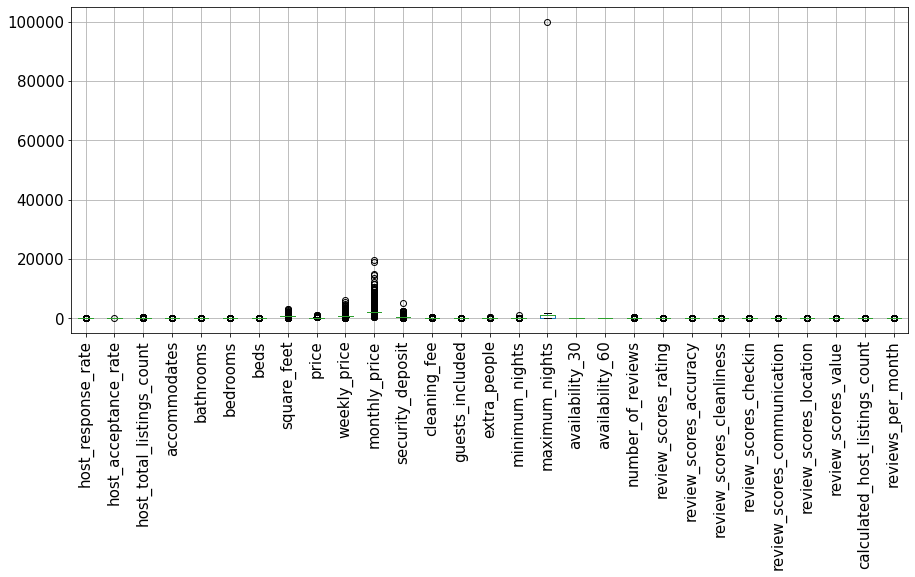

In [19]:
# we decide to remove outliers because there is a huge difference between outliers and mean 
# so it may significanlty affect our results 
# first, we can check some outliers with plot
df[all_columns_to_replace].boxplot(figsize=(15,6), fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [20]:
# Removing outliers
z_scores = stats.zscore(df[all_columns_to_replace])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
newdf = df[filtered_entries]

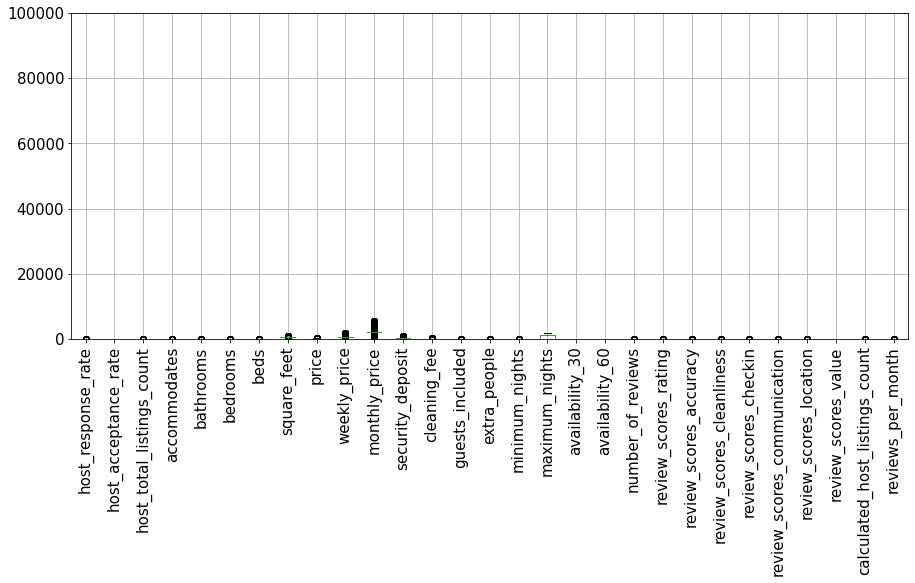

In [21]:
# now, we see no outliers 
newdf[all_columns_to_replace].boxplot(figsize=(15,6), fontsize=15)
plt.ylim(0,100000)
plt.xticks(rotation=90)
plt.show()

In [22]:
# Before dropping insignificant columns: instances 3818 & attributes 92  
# Before dropping outliers: instances 3818 & attributes 48
# As a result, we removed 941 records so far
newdf.shape

(2877, 47)

### **Dealing with "Categorical Variables"**

In [23]:
newdf.head()

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,2013-02-21,"Seattle, Washington, United States",within an hour,98.0,100.0,t,Queen Anne,6.0,t,t,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
3,2013-11-06,"Seattle, Washington, United States",NaN,100.0,100.0,f,Queen Anne,1.0,t,t,...,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.54
5,2010-12-25,"Seattle, Washington, United States",NaN,100.0,100.0,f,Queen Anne,1.0,t,t,...,10.0,10.0,10.0,10.0,f,strict,f,f,1,2.45
6,2012-05-30,"Seattle, Washington, United States",within an hour,100.0,100.0,t,Queen Anne,1.0,t,t,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,2.46
8,2012-04-18,"Seattle, Washington, United States",NaN,100.0,100.0,f,Queen Anne,1.0,t,t,...,10.0,9.0,10.0,10.0,f,strict,f,f,1,1.22


In [24]:
newdf.columns

Index(['host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'zipcode', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calcul

In [25]:
# Checking each columns
# "city"
newdf.city.unique()

array(['Seattle', 'Ballard, Seattle', 'West Seattle', 'Seattle ', '西雅图',
       'Phinney Ridge Seattle', 'seattle'], dtype=object)

In [26]:
# filter out this row
newdf = newdf[newdf.city != '西雅图']
newdf.city.value_counts()

Seattle                  2869
Seattle                     2
West Seattle                2
seattle                     1
Ballard, Seattle            1
Phinney Ridge Seattle       1
Name: city, dtype: int64

In [27]:
# Changing values into more an understandalbe format
columns_to_change_values = ["host_is_superhost", "instant_bookable", "host_has_profile_pic",
                           "host_identity_verified", "is_location_exact", "require_guest_profile_picture",
                           "require_guest_phone_verification"]
newdf[columns_to_change_values].head()

,host_is_superhost,instant_bookable,host_has_profile_pic,host_identity_verified,is_location_exact,require_guest_profile_picture,require_guest_phone_verification
1,t,f,t,t,t,t,t
3,f,f,t,t,t,f,f
5,f,f,t,t,t,f,f
6,t,f,t,t,t,f,f
8,f,f,t,t,t,f,f


In [28]:
columns_to_change_values = ["host_is_superhost", "instant_bookable", "host_has_profile_pic",
                           "host_identity_verified", "is_location_exact", "require_guest_profile_picture",
                           "require_guest_phone_verification"]
def change_value(v):
    newdf[v] = newdf[v].map({"t":"True", "f":"False"})

for i in columns_to_change_values:
    change_value(i)
    
newdf[columns_to_change_values].head()

,host_is_superhost,instant_bookable,host_has_profile_pic,host_identity_verified,is_location_exact,require_guest_profile_picture,require_guest_phone_verification
1,True,False,True,True,True,True,True
3,False,False,True,True,True,False,False
5,False,False,True,True,True,False,False
6,True,False,True,True,True,False,False
8,False,False,True,True,True,False,False


In [29]:
# Checking remaining NaN
newdf.isnull().sum().sum()

987

In [30]:
# Dropping remaining NaN
newdf = newdf.dropna()
newdf.isnull().sum().sum()

0

In [31]:
# 1) instances 3818, attributes 92  
# 2) instances 3818, attributes 48
# 3) instances 2877, attributes 48 
# After dropping categorical NaN values, we removed 691 records
newdf.shape

(2186, 47)

# Step3) Statistical Analysis

In [32]:
# Summary statistics using describe()
newdf.describe()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2186.000000,2186.0,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,...,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000
mean,97.063129,100.0,3.461116,3.042543,1.142040,1.144556,1.553980,749.048490,109.542086,668.073193,...,23.037511,95.748856,9.792315,9.734675,9.901189,9.918573,9.705855,9.628545,2.065416,2.145663
std,7.262558,0.0,7.373687,1.446695,0.372478,0.647587,0.810156,21.746099,54.204345,239.375056,...,27.456301,3.882786,0.440361,0.509009,0.298476,0.273553,0.513375,0.537125,2.310225,1.482212
min,63.000000,100.0,1.000000,1.000000,0.000000,0.000000,1.000000,435.000000,22.000000,161.000000,...,0.000000,77.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,1.000000,0.030000
25%,100.000000,100.0,1.000000,2.000000,1.000000,1.000000,1.000000,750.000000,70.000000,575.000000,...,3.000000,94.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.040000
50%,100.000000,100.0,1.000000,2.000000,1.000000,1.000000,1.000000,750.000000,99.000000,650.000000,...,13.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.620000
75%,100.000000,100.0,3.000000,4.000000,1.000000,1.000000,2.000000,750.000000,135.000000,650.000000,...,32.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,100.000000,100.0,84.000000,8.000000,3.000000,3.000000,5.000000,1000.000000,395.000000,1899.000000,...,135.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000,7.020000


In [57]:
# Summary of only numerical values
numdf = newdf.select_dtypes(include=["float64"])
summary = pd.DataFrame({
    'Mean': numdf.mean(),
    'Standard Deviation': numdf.std(),
    'Max': numdf.max(),
    'Min': numdf.min(),
    'Median': numdf.median(),
    'Length': len(numdf),
    'Missing Values': numdf.isnull().sum()
})
summary.sort_values(by = "Mean", ascending=False)

,Mean,Standard Deviation,Max,Min,Median,Length,Missing Values
monthly_price,2251.978042,670.252704,5600.00,500.00,2200.00,2186,0
square_feet,749.048490,21.746099,1000.00,435.00,750.00,2186,0
weekly_price,668.073193,239.375056,1899.00,161.00,650.00,2186,0
security_deposit,243.496798,96.777805,800.00,95.00,250.00,2186,0
price,109.542086,54.204345,395.00,22.00,99.00,2186,0
host_acceptance_rate,100.000000,0.000000,100.00,100.00,100.00,2186,0
host_response_rate,97.063129,7.262558,100.00,63.00,100.00,2186,0
review_scores_rating,95.748856,3.882786,100.00,77.00,96.00,2186,0
cleaning_fee,50.359103,27.843886,175.00,5.00,50.00,2186,0
review_scores_communication,9.918573,0.273553,10.00,9.00,10.00,2186,0


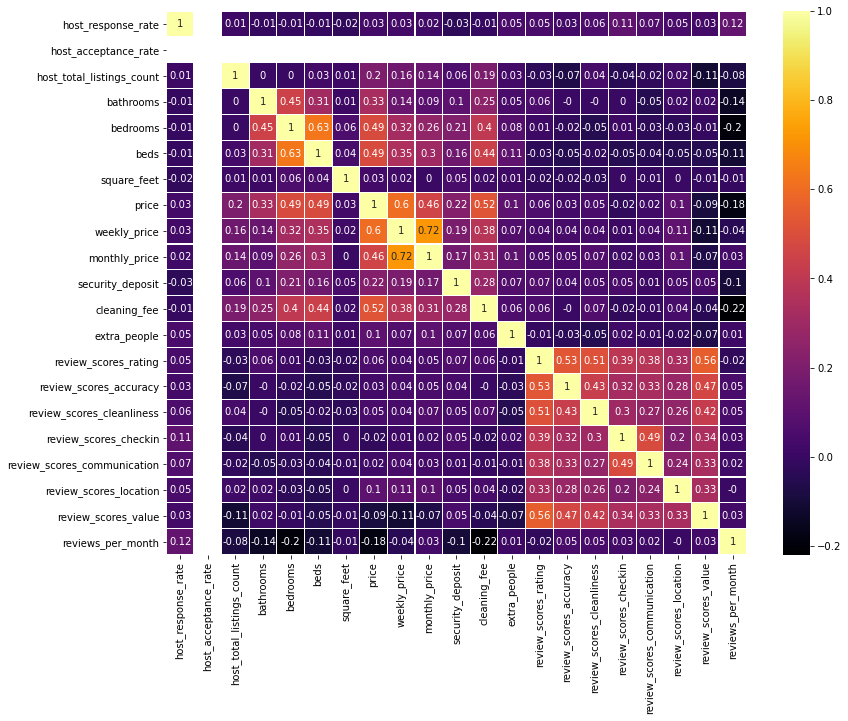

In [52]:
# Created a heatmap to understand correlation between numerical variables
plt.figure(figsize = (13,10))
sns.heatmap(round(numdf.corr(),2), annot=True, linewidth=0.1, cmap="inferno")
plt.show()

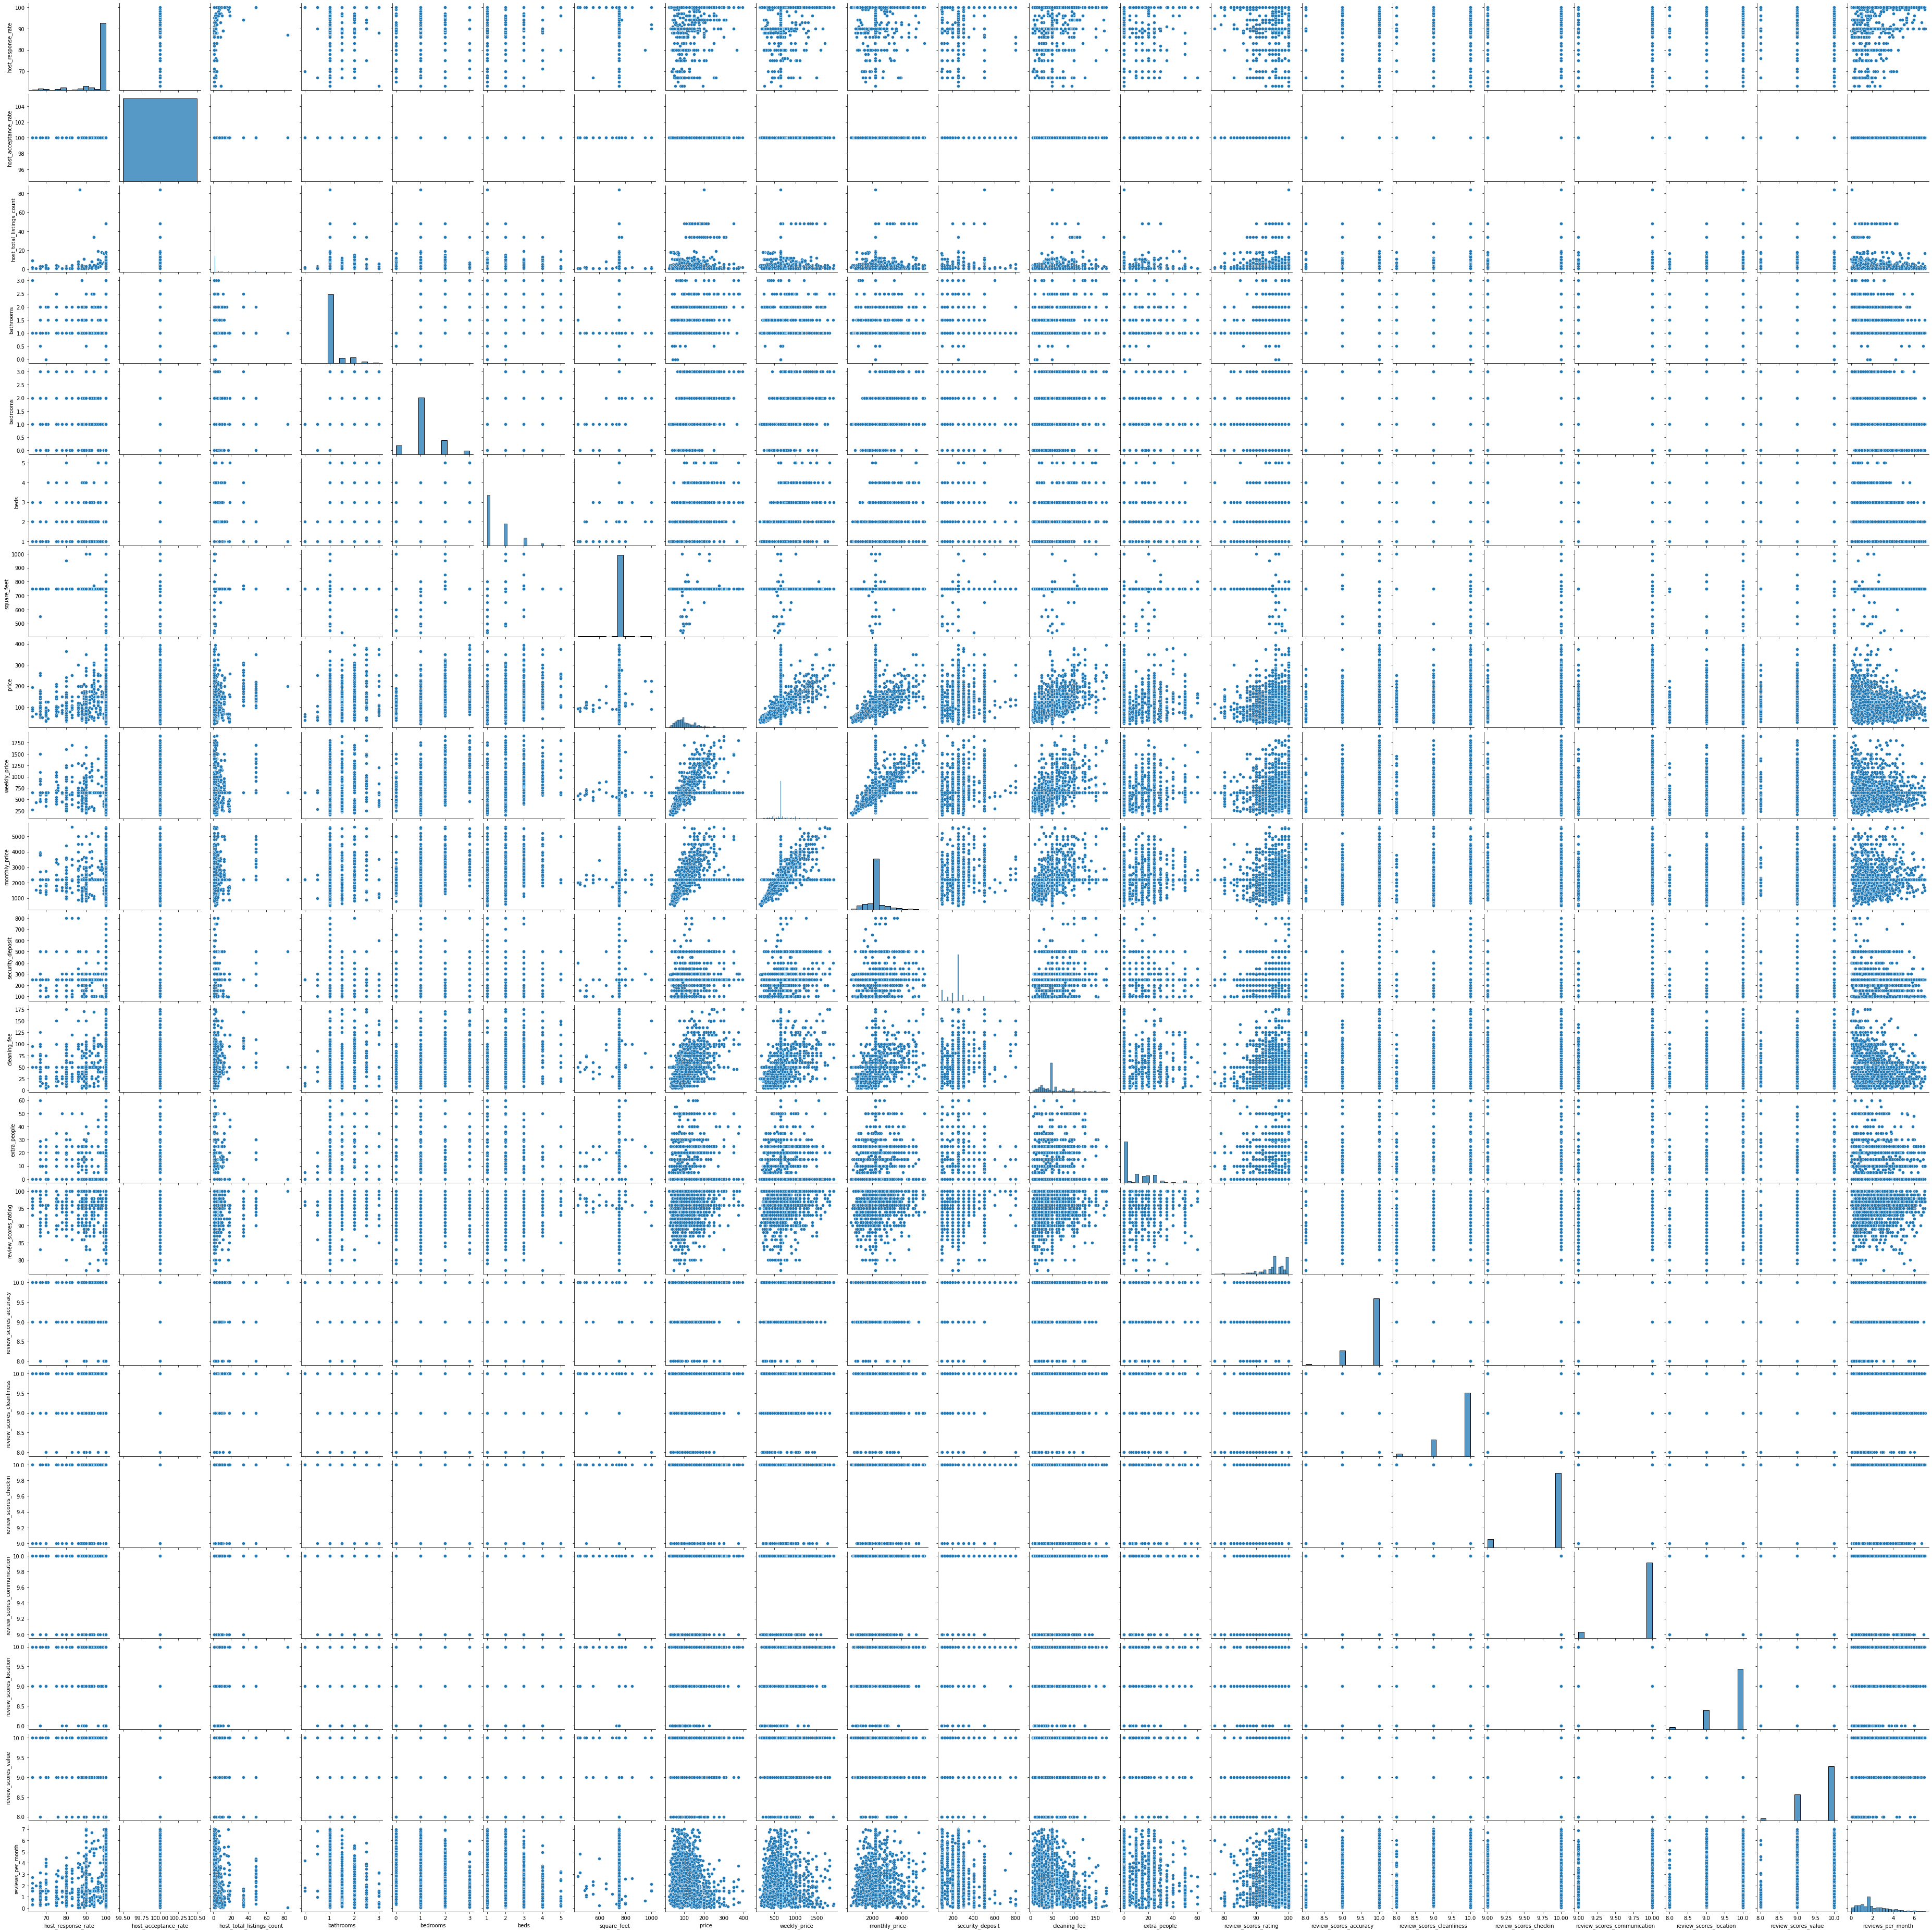

In [59]:
# Based on the pariplot below, we can see that many of the variables do not have normal gaussian distribution, 
sns.pairplot(numdf)
plt.show()

# Step4) Data Visualization

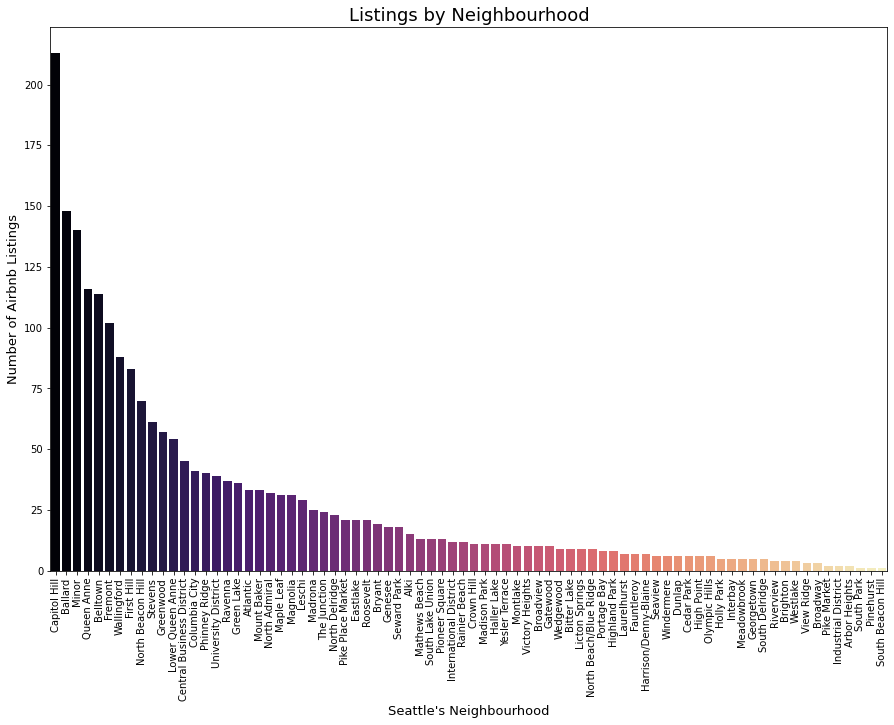

In [67]:
# created a bar plot to visualize the amount of listings per neighborhood
plt.figure(figsize=(15,10))
sns.countplot(x="neighbourhood",
              data = newdf,
              order = newdf['neighbourhood'].value_counts().index,
              palette = "magma")

plt.xticks(rotation=90)
plt.xlabel("Seattle's Neighbourhood", size = 13)
plt.ylabel("Number of Airbnb Listings", size = 13)
plt.title("Listings by Neighbourhood", size = 18)
plt.show()

<Figure size 1080x720 with 0 Axes>

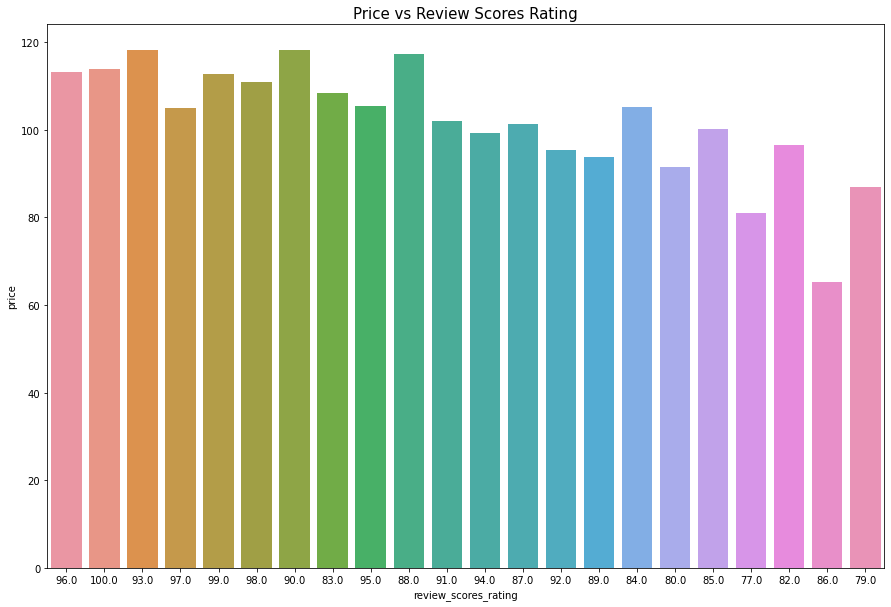

In [165]:
# Price vs Review Scores Rating
plot_order = newdf.groupby('review_scores_rating')['price'].max().sort_values(ascending=False).index.values
plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(y="price", x="review_scores_rating", ax=ax, order=plot_order, data=newdf, ci=None)
plt.title("Price vs Review Scores Rating", size = 15)
plt.show()

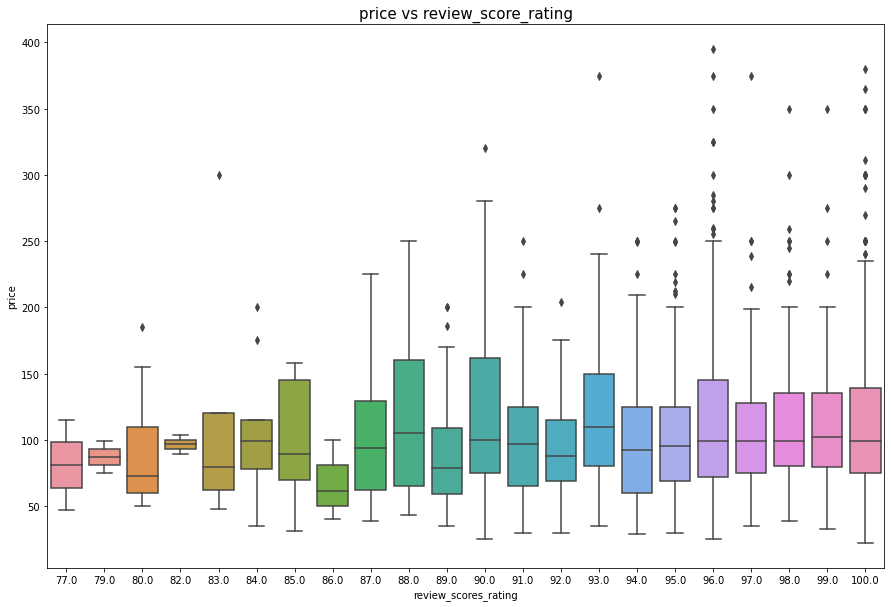

In [167]:
# Price vs Reviews scores rating to identify outliers
plt.figure(figsize=(15,10))
sns.boxplot(x="review_scores_rating", y="price", data=newdf)
plt.title("price vs review_score_rating", fontsize = 15)
plt.show()

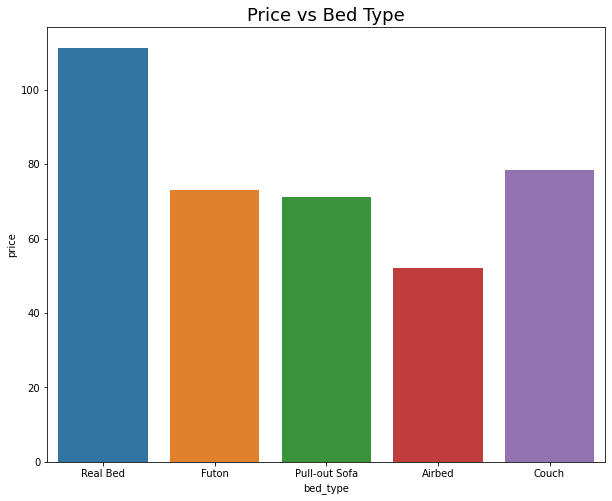

In [168]:
# Pirce vs Bed Type
plt.figure(figsize = (10,8))
sns.barplot(x="bed_type",
           y="price",
           data=newdf, ci=None)
plt.title("Price vs Bed Type", size = 18)
plt.show()

# Step5) Exporting the clean data to a database

In [171]:
import sqlite3
from sqlite3 import Error

In [173]:
conn = sqlite3.connect('Airbnb.db')

In [174]:
c = conn.cursor()

In [175]:
c.execute('CREATE TABLE Seattle_Listings (id integer PRIMARY KEY,host_since text NOT NULL,host_location text NOT NULL,host_response_time txt NOT NULL,host_response_rate float NOT NULL,host_acceptance_rate float NOT NULL,host_is_superhost text NOT NULL,host_neighbourhood text NOT NULL,host_total_listings_count float NOT NULL,host_has_profile_pic text NOT NULL,host_identity_verified text NOT NULL,neighbourhood text NOT NULL,city text NOT NULL,zipcode text NOT NULL,is_location_exact text NOT NULL,property_type text NOT NULL,room_type text NOT NULL,accommodates int NOT NULL,bathrooms float NOT NULL,bedrooms float NOT NULL,beds float NOT NULL,bed_type text NOT NULL,square_feet float NOT NULL,price float NOT NULL,weekly_price float NOT NULL,monthly_price float NOT NULL,security_deposit float NOT NULL,cleaning_fee float NOT NULL,guests_included int NOT NULL,extra_people float NOT NULL,minimum_nights int NOT NULL,maximum_nights int NOT NULL,availability_30 int NOT NULL,availability_60 int NOT NULL,number_of_reviews int NOT NULL,review_scores_rating float NOT NULL,review_scores_accuracy float NOT NULL,review_scores_cleanliness float NOT NULL,review_scores_checkin float NOT NULL,review_scores_communication float NOT NULL,review_scores_location float NOT NULL,review_scores_value float NOT NULL,instant_bookable text NOT NULL,cancellation_policy text NOT NULL,require_guest_profile_picture text NOT NULL,require_guest_phone_verification text NOT NULL,calculated_host_listings_count int NOT NULL,reviews_per_month float NOT NULL)')

In [176]:
conn.commit()

In [178]:
df.to_sql("Seattle_Listings", conn, if_exists="replace", index=False)

In [179]:
pd.read_sql("SELECT * FROM Seattle_Listings", conn)

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2011-08-11,"Seattle, Washington, United States",within a few hours,96.0,100.0,f,Queen Anne,3.0,t,t,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,2013-02-21,"Seattle, Washington, United States",within an hour,98.0,100.0,t,Queen Anne,6.0,t,t,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,2014-06-12,"Seattle, Washington, United States",within a few hours,67.0,100.0,f,Queen Anne,2.0,t,t,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,2013-11-06,"Seattle, Washington, United States",None,100.0,100.0,f,Queen Anne,1.0,t,t,...,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.54
4,2011-11-29,"Seattle, Washington, United States",within an hour,100.0,100.0,f,Queen Anne,2.0,t,t,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,2015-04-13,US,within a few hours,99.0,100.0,f,Holly,354.0,t,t,...,4.0,8.0,10.0,8.0,f,strict,f,f,8,0.30
3814,2015-10-14,"Seattle, Washington, United States",within an hour,100.0,100.0,f,Portage Bay,1.0,t,t,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,2.00
3815,2015-12-30,US,None,100.0,100.0,f,None,1.0,t,f,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.54
3816,2015-01-03,"Tacoma, Washington, United States",within an hour,100.0,100.0,f,None,1.0,t,t,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.54


In [180]:
# Check to see if db file is populated
conn = sqlite3.connect("Airbnb.db")
pd.read_sql("SELECT * FROM Seattle_Listings", conn)

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2011-08-11,"Seattle, Washington, United States",within a few hours,96.0,100.0,f,Queen Anne,3.0,t,t,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,2013-02-21,"Seattle, Washington, United States",within an hour,98.0,100.0,t,Queen Anne,6.0,t,t,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,2014-06-12,"Seattle, Washington, United States",within a few hours,67.0,100.0,f,Queen Anne,2.0,t,t,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,2013-11-06,"Seattle, Washington, United States",None,100.0,100.0,f,Queen Anne,1.0,t,t,...,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.54
4,2011-11-29,"Seattle, Washington, United States",within an hour,100.0,100.0,f,Queen Anne,2.0,t,t,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,2015-04-13,US,within a few hours,99.0,100.0,f,Holly,354.0,t,t,...,4.0,8.0,10.0,8.0,f,strict,f,f,8,0.30
3814,2015-10-14,"Seattle, Washington, United States",within an hour,100.0,100.0,f,Portage Bay,1.0,t,t,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,2.00
3815,2015-12-30,US,None,100.0,100.0,f,None,1.0,t,f,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.54
3816,2015-01-03,"Tacoma, Washington, United States",within an hour,100.0,100.0,f,None,1.0,t,t,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.54
